## 1. Read in the nhefs.xlsx file from the EPI 289 course website. Show your log to demonstrate that the file was successfully assigned. 

In [115]:
library(readxl)
df <- read_excel("nhefs.xlsx")

In [116]:
setwd('/PHShome/hj927/EPI289')

In [117]:
head(df)

seqn,qsmk,death,yrdth,modth,dadth,sbp,dbp,sex,age,⋯,birthcontrol,pregnancies,cholesterol,hightax82,price71,price82,tax71,tax82,price71_82,tax71_82
233,0,0,NA,NA,NA,175,96,0,42,⋯,2,NA,197,0,2.183594,1.739990,1.1022949,0.4619751,0.44378662,0.6403809
235,0,0,NA,NA,NA,123,80,0,36,⋯,2,NA,301,0,2.346680,1.797363,1.3649902,0.5718994,0.54931641,0.7929688
244,0,0,NA,NA,NA,115,75,1,56,⋯,0,2,157,0,1.569580,1.513428,0.5512695,0.2309875,0.05619812,0.3202515
245,0,1,85,2,14,148,78,0,68,⋯,2,NA,174,0,1.506592,1.451904,0.5249023,0.2199707,0.05479431,0.3049927
252,0,0,NA,NA,NA,118,77,0,40,⋯,2,NA,216,0,2.346680,1.797363,1.3649902,0.5718994,0.54931641,0.7929688
257,0,0,NA,NA,NA,141,83,1,43,⋯,0,1,212,1,2.209961,2.025879,1.1547852,0.7479248,0.18408203,0.4069824


## 2.   Sort the data set by the variable seqn. Print out the ID number, age, and sex for the first 10 observations.   

In [118]:
df <- df[order(df$'seqn'),] 
df[1:10, c('seqn','age', 'sex')]

seqn,age,sex
233,42,0
235,36,0
244,56,1
245,68,0
252,40,0
257,43,1
262,56,1
266,29,1
419,51,0
420,43,0


## 3. 	Find the mean systolic blood pressure and standard error for men and for women

In [119]:
df_men <- subset(df, sex==0)
df_women <- subset(df, sex==1)

In [120]:
mean(df_men$'sbp', na.rm=T)

[1] 131.2467

In [124]:
mean(df[which(df$'sex'==0),]$'sbp', na.rm=T)
mean(df[which(df$'sex'==1),]$'sbp', na.rm=T)

[1] 131.2467

[1] 126.312

In [42]:
mean(df_women$'sbp', na.rm=T)

[1] 126.312

In [47]:
sd(df_women$'sbp', na.rm=T)/sqrt(length(df_women$'sbp'))

[1] 0.6573326

In [48]:
sd(df_men$'sbp', na.rm=T)/sqrt(length(df_men$'sbp'))

[1] 0.6670224

In [128]:
mean(df[which(df$'sex'==0),]$'sbp', na.rm=T)/sqrt(length(df[which(df$'sex'==0),]$'sbp'[!is.na(df[which(df$'sex'==0),]$'sbp')]))

[1] 4.779722

In [127]:
mean(df[which(df$'sex'==1),]$'sbp', na.rm=T)/sqrt(length(df[which(df$'sex'==1),]$'sbp'[!is.na(df[which(df$'sex'==1),]$'sbp')]))

[1] 4.471397

## 4. 	What is the mean, 25th percentile, 50th percentile, 75th percentile, and interquartile range of weight in 1971 (in kilograms).

In [53]:
quantile(df$'wt71', probs = 0.25)
quantile(df$'wt71', probs = 0.50)
quantile(df$'wt71', probs = 0.75)
IQR(df$'wt71')  #quantile(df$'wt71', probs = 0.75)-quantile(df$'wt71', probs = 0.25)

25% 
59.65

50% 
69.4

75% 
79.95

[1] 20.3

In [129]:
quantile(df$'wt71', c(.25, .50, .75))

25%   50%   75% 
59.65 69.40 79.95

## 5a. Using ifelse statements, create a new categorical variable corresponding to quartiles of weight in 1971 as based on the cut-points from Question (4). Give a tabulation of your results. 

In [105]:
df$'wt71_25' <- ifelse(df$'wt71' < quantile(df$'wt71', probs = 0.25), 1, 0)
df$'wt71_50' <- ifelse(quantile(df$'wt71', probs = 0.25)< df$'wt71' &  df$'wt71'< quantile(df$'wt71', probs = 0.50), 
                       1, 0)
df$'wt71_75' <- ifelse(quantile(df$'wt71', probs = 0.50)< df$'wt71' & df$'wt71'< quantile(df$'wt71', probs = 0.75), 
                       1, 0)

# mistake: didn't include the cutoff value itself

In [107]:
table(df$'wt71_25')
table(df$'wt71_50')
table(df$'wt71_75')


   0    1 
1223  406 


   0    1 
1229  400 


   0    1 
1227  402 

In [130]:
#answer
df$'wt71_q1' <- ifelse(df$'wt71' <= 59.65, 1, ifelse(df$'wt71' <= 69.4, 2, ifelse(df$'wt71' <= 79.95, 3, 4)))

In [131]:
table(df$'wt71_q1')

# any model with categorical variable, we can use as.factor(CATEGORICAL_VARIABLE)


  1   2   3   4 
414 402 406 407 

## 5b. Create quartiles for weight in 1971 using cut in R. Give a tabulation of your results. Do your results match those of Question (5a)? Why or why not?

In [110]:
df_quart <- cut(df$'wt71', breaks = c(-Inf, quantile(df$'wt71', probs = 0.25), quantile(df$'wt71', probs = 0.50),
                                      quantile(df$'wt71', probs = 0.75), Inf))

In [133]:
table(df_quart)

df_quart
(-Inf,59.6] (59.6,69.4]   (69.4,80]   (80, Inf] 
        414         402         406         407 

In [132]:
# answer
table(df_quart, df_quart)

             df_quart
df_quart      (-Inf,59.6] (59.6,69.4] (69.4,80] (80, Inf]
  (-Inf,59.6]         414           0         0         0
  (59.6,69.4]           0         402         0         0
  (69.4,80]             0           0       406         0
  (80, Inf]             0           0         0       407

## 6. 	Using lm in R, fit a univariate linear regression model for the outcome weight in 1971 with number of cigarettes smoked per day in 1971 as the predictor. Report the parameter estimate for cigarettes smoked per day. 

In [58]:
linear_model <- lm(df$'wt71' ~ df$'smokeintensity', data = df)

In [134]:
linear_model <- lm(wt71 ~ smokeintensity, data = df)

In [135]:
coef(linear_model)
confint(linear_model)

(Intercept) smokeintensity 
    68.7349725      0.1127502

,2.5 %,97.5 %
(Intercept),67.20484656,70.2650984
smokeintensity,0.04818256,0.1773178


In [61]:
summary(linear_model)


Call:
lm(formula = df$wt71 ~ df$smokeintensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.345 -11.452  -1.718   8.840  99.891 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       68.73497    0.78011  88.109  < 2e-16 ***
df$smokeintensity  0.11275    0.03292   3.425  0.00063 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.68 on 1627 degrees of freedom
Multiple R-squared:  0.007159,	Adjusted R-squared:  0.006549 
F-statistic: 11.73 on 1 and 1627 DF,  p-value: 0.0006298


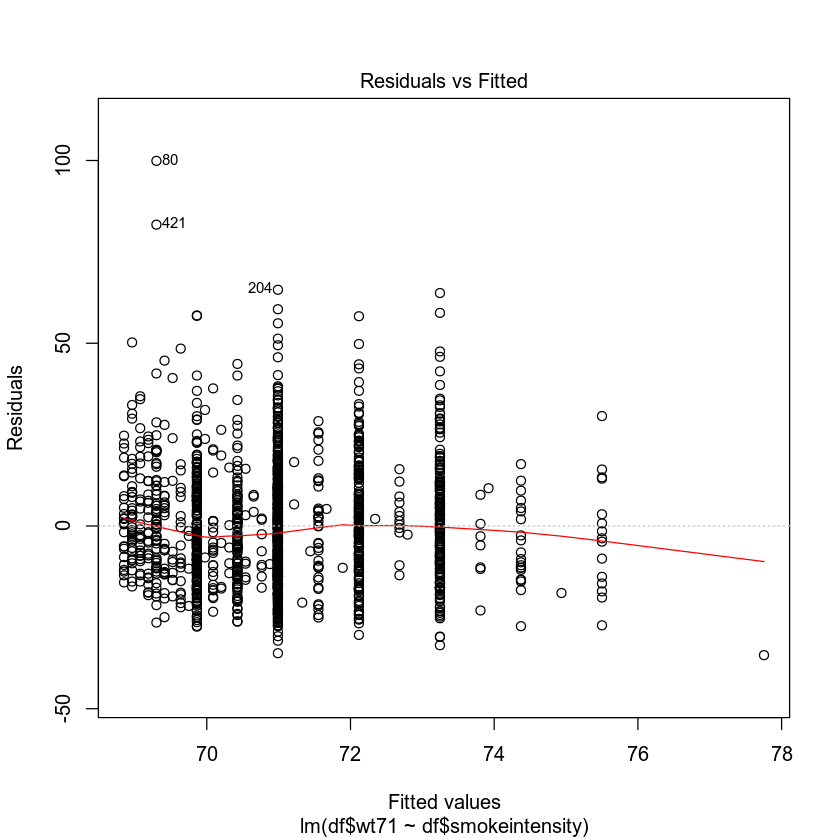

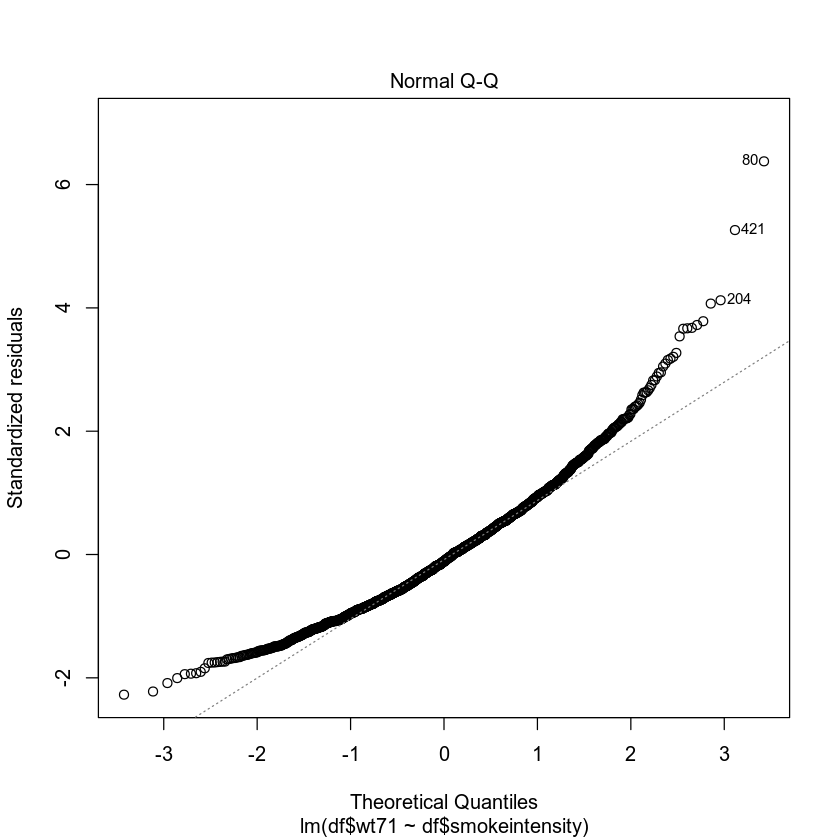

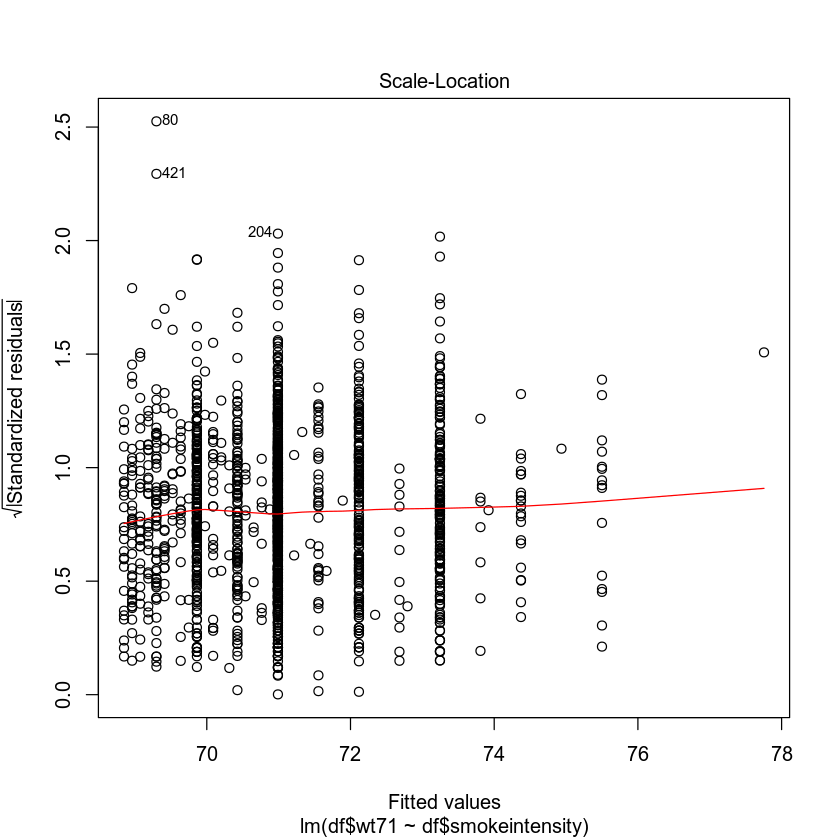

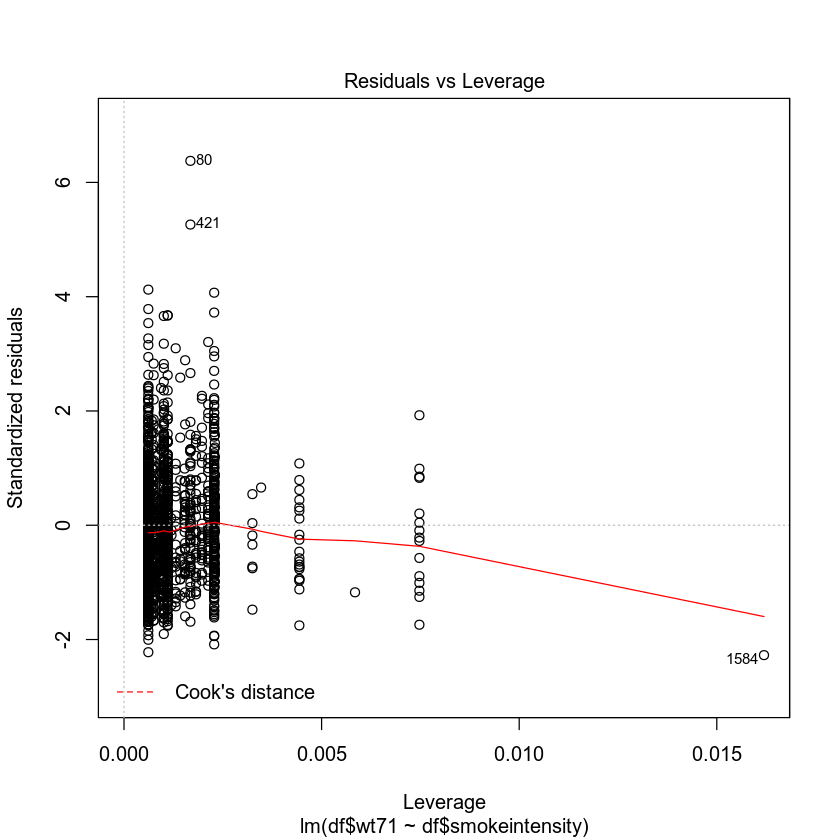

In [62]:
plot(linear_model)

## 7.   Create a cross-tabulation between sex and race

In [63]:
table(df$'sex', df$'race', dnn = c("sex","race"))

   race
sex   0   1
  0 705  94
  1 709 121

In [136]:
#answer
table(df[, c("sex","race")])

   race
sex   0   1
  0 705  94
  1 709 121

## 8. 	Using lm in R, fit a multivariate linear regression model for the outcome weight in  1971 with age, sex, and race as the predictors. From this model, print the observed and predicted values of weight in 1971 for the first 5 observations. What is the predicted value of weight in 1971 for an individual of age 40, female, and of Black or other race/ethnicity? 

In [137]:
multivar_linear_model <- lm(wt71 ~ age+as.factor(sex)+as.factor(race), data = df)
#multivrate linear regression: multiple outcomes
#multiple linear regression: multiple 

In [138]:
summary(multivar_linear_model)


Call:
lm(formula = wt71 ~ age + as.factor(sex) + as.factor(race), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.335  -9.499  -2.030   7.159  86.753 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       77.098741   1.402205  54.984  < 2e-16 ***
age               -0.006316   0.029181  -0.216    0.829    
as.factor(sex)1  -12.748300   0.710786 -17.936  < 2e-16 ***
as.factor(race)1   5.502288   1.048280   5.249 1.73e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.31 on 1625 degrees of freedom
Multiple R-squared:  0.1741,	Adjusted R-squared:  0.1726 
F-statistic: 114.2 on 3 and 1625 DF,  p-value: < 2.2e-16


In [86]:
covariate_values <- data.frame('age' = 40, 'sex' = 1, 'race'=1)
predicted_mean <- predict(multivar_linear_model, covariate_values)

In [142]:
#answer
pred.data <- data.frame('age' = 40, 'sex' = 1, 'race'=1)
predict(multivar_linear_model, pred.data)

1 
69.60009

In [98]:
multiv_wt <- predict(multivar_linear_model, df[1:5, c('age','sex', 'race')], type = "response")
multiv_wt

1        2        3        4        5 
82.33576 76.87137 69.49903 82.17154 76.84610

In [141]:
# answer
df$'predy' <- predict.lm(multivar_linear_model)
df[1:5, c("wt71", "predy")]

# these covariates are not the best predictor of weight

wt71,predy
79.04,82.33576
58.63,76.87137
56.81,69.49903
59.42,82.17154
87.09,76.84610


In [87]:
predicted_mean

1 
69.60009

## 9. 	Fit the same model from Question (8) using glm in R and compare your results.

In [101]:
logistic_model <- glm(wt71 ~ age+as.factor(sex)+as.factor(race), data = df)

In [102]:
glm_wt <- predict(logistic_model, df[1:5, c('age','sex', 'race')], type = "response")
glm_wt

#glm is the subset of lm

1        2        3        4        5 
82.33576 76.87137 69.49903 82.17154 76.84610

In [83]:
logistic_pred <- predict(logistic_model, covariate_values)

In [85]:
logistic_pred

1 
69.60009

# 10. Using glm with family specified as binomial in R, fit a multivariate logistic regression model for the outcome asthma diagnosis in 1971 with age, sex, race, and usual physical activity status (var active) as the predictors. Print the predicted probabilities of asthma diagnosis for the individuals with the first 5 ID numbers. 

In [90]:
bin_glm <- glm(asthma ~ age+as.factor(sex)+as.factor(race)+as.factor(active), family=binomial(link = 'logit'),
               data = df)
# linear regression: errors are distributed normally
# binomial : errors are distributed binomially 
# family=binomial(link = 'logit'): error follows binomial distribution, and links the var and outcome using logit
# link: logit transformation - error to be in functional component
# linear regression - link=gaussian (default is below:)
lin_glm <- glm(asthma ~ age+as.factor(sex)+as.factor(race)+as.factor(active), family=gaussian(link = 'identity'),
               data = df)
# logistic regression - logloss scale

In [96]:
asthma_pred <- predict(bin_glm, df[1:5, c('age','sex', 'race', 'active')], type = "response")
asthma_pred

1          2          3          4          5 
0.02287751 0.03464734 0.04262889 0.02952948 0.03570667

In [ ]:
# answer
# model the log odds - exponentiality expit function (e^x/(1+e^x)): log odds to probability (constrained btw 0-1)
# expit (inverse of logit function)

***

predict(bin_glm, type='response')

## 11. (Optional) Create a graph that plots systolic blood pressure on the Y-axis and usual physical activity status (var active) on the X-axis

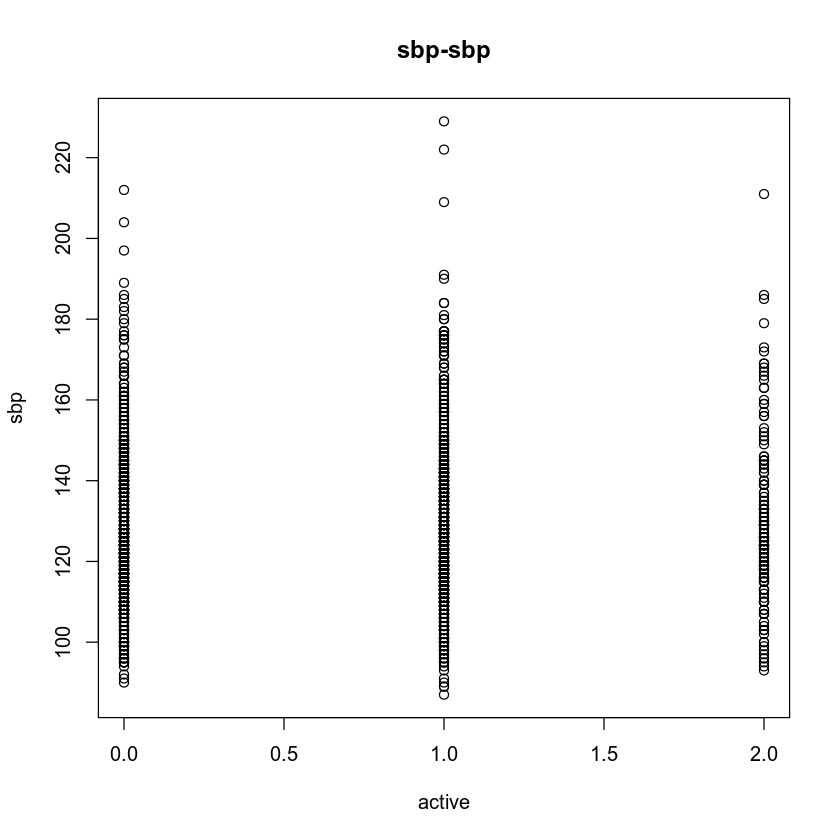

In [104]:
plot(df$active, df$sbp, xlab="active", ylab="sbp", main="active-sbp")
#ggplot